In [4]:
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib inline

from plotting import plot_utils, summary_plots, load_fits, plot_prf_params, pycortex_plot_utils
plot_utils.set_all_font_sizes(12)
from utils import roi_utils, default_paths, stats_utils, nsd_utils

In [3]:
# Load results of the fitting procedure

subjects = np.arange(1,9)
n_subjects = len(subjects)

# fitting_type = 'alexnet_best_layer_pca'
fitting_type = 'alexnet_all_conv_pca'

out = [load_fits.load_fit_results(subject=ss, fitting_type=fitting_type, \
                                  n_from_end=0, verbose=False) \
       for ss in subjects]
fig_save_folder=None

roi_def = roi_utils.multi_subject_roi_def(subjects)
roi_names =roi_def.roi_names


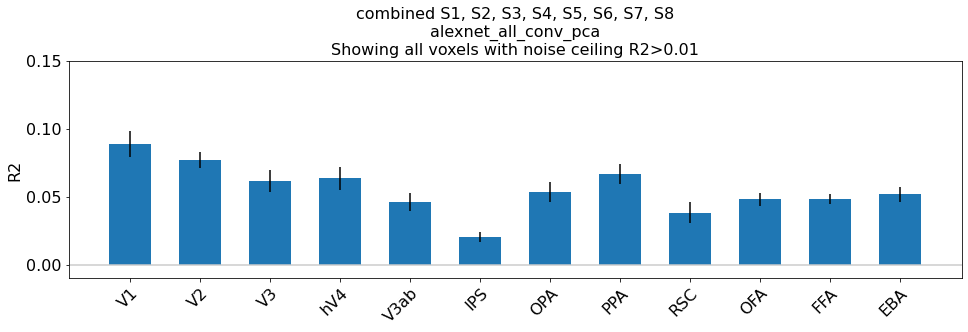

In [10]:
summary_plots.barplot_R2_all(fitting_type, out, roi_def, ylims=[-0.01, 0.15])
fn2save = '/user_data/mmhender/imStat/figures/alexnet_mean_r2.pdf'
plt.savefig(fn2save)

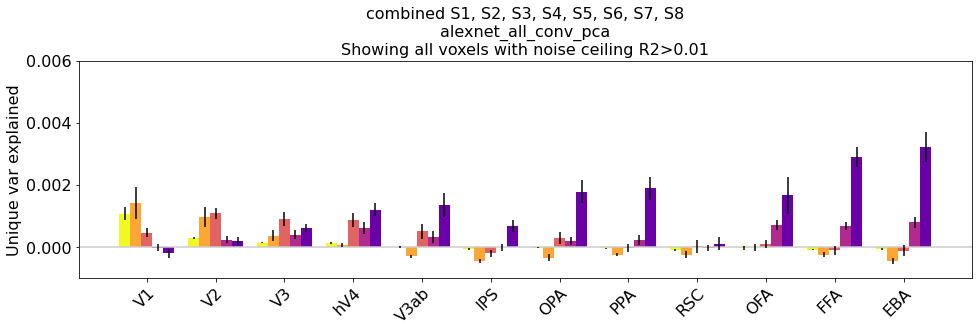

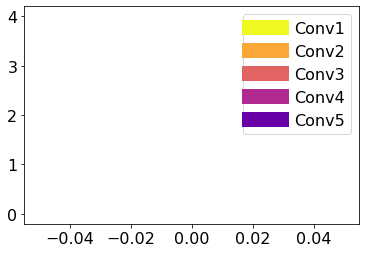

In [8]:
# Make a barplot for variance partition across all ROIs and subjects
roi_names =roi_def.roi_names
areas2plot = np.arange(len(roi_names))

nc_thresh = 0.01

# each of these indices is one feature set left out at a time.
ve_names = ['Conv%d'%(ll+1) for ll in range(5)]

colors = np.flipud(cm.plasma(np.linspace(0,1,6))[1:,:])

vals = np.zeros((n_subjects, len(areas2plot), 5))

for si, ss in enumerate(subjects):
    
    val_r2 = out[si]['val_r2']    
    nc = nsd_utils.ncsnr_to_nc(out[si]['voxel_ncsnr'][out[si]['voxel_mask']])/100
    inds2use = nc>nc_thresh
    var_expl = np.tile(val_r2[:,0:1], [1,5]) - val_r2[:,[2,4,6,8,10]]


    for ri, rr in enumerate(areas2plot):
        
        inds_this_roi = roi_def.ss_roi_defs[si].get_indices(rr) & inds2use
        if np.sum(inds_this_roi)==0:
            print('subj %d %s has no voxels'%(ss, roi_names[rr]))
            vals[si,ri,:] = np.nan
        vals[si,ri,:] = np.mean(var_expl[inds_this_roi,:], axis=0)
        
mean_vals = np.mean(vals, axis=0)
sem_vals = np.std(vals, axis=0) / np.sqrt(n_subjects)

legend_separate=True
title='%s\n%s\nShowing all voxels with noise ceiling R2>%.2f'%(summary_plots.get_substr(out), \
                                                                       fitting_type, nc_thresh)

plot_utils.set_all_font_sizes(fs = 16)
fh = plot_utils.plot_multi_bars(mean_data=mean_vals, err_data=sem_vals, colors=colors, space=0.1, \
                xticklabels=np.array(roi_names)[areas2plot], ylabel='Unique var explained', \
                ylim=[-0.001, 0.006], title=title, horizontal_line_pos=0,\
                legend_labels=ve_names, \
                legend_overlaid=False, legend_separate=legend_separate, \
                fig_size=(16,4))


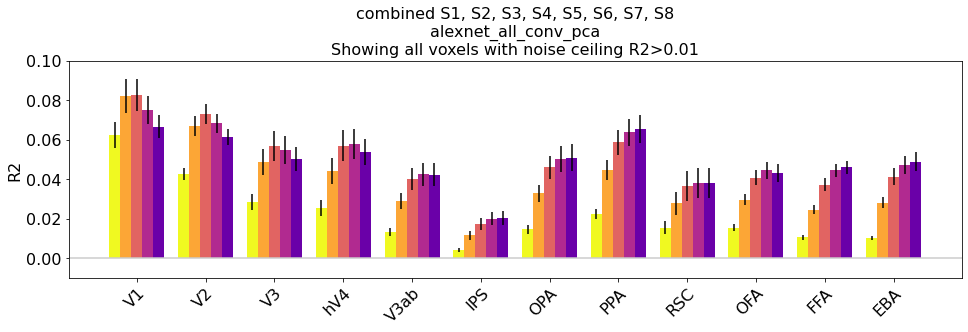

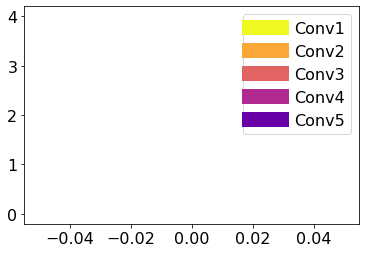

In [14]:
# Make a barplot for variance partition across all ROIs and subjects
roi_names =roi_def.roi_names
areas2plot = np.arange(len(roi_names))

nc_thresh = 0.01

# each of these indices is one feature set left out at a time.
ve_names = ['Conv%d'%(ll+1) for ll in range(5)]

colors = np.flipud(cm.plasma(np.linspace(0,1,6))[1:,:])

vals = np.zeros((n_subjects, len(areas2plot), 5))

for si, ss in enumerate(subjects):
    
    val_r2 = out[si]['val_r2'][:,[1,3,5,7,9]]
    nc = nsd_utils.ncsnr_to_nc(out[si]['voxel_ncsnr'][out[si]['voxel_mask']])/100
    inds2use = nc>nc_thresh


    for ri, rr in enumerate(areas2plot):
        
        inds_this_roi = roi_def.ss_roi_defs[si].get_indices(rr) & inds2use
        if np.sum(inds_this_roi)==0:
            print('subj %d %s has no voxels'%(ss, roi_names[rr]))
            vals[si,ri,:] = np.nan
        vals[si,ri,:] = np.mean(val_r2[inds_this_roi,:], axis=0)
        
mean_vals = np.mean(vals, axis=0)
sem_vals = np.std(vals, axis=0) / np.sqrt(n_subjects)

legend_separate=True
title='%s\n%s\nShowing all voxels with noise ceiling R2>%.2f'%(summary_plots.get_substr(out), \
                                                                       fitting_type, nc_thresh)

plot_utils.set_all_font_sizes(fs = 16)
fh = plot_utils.plot_multi_bars(mean_data=mean_vals, err_data=sem_vals, colors=colors, space=0.1, \
                xticklabels=np.array(roi_names)[areas2plot], ylabel='R2', \
                ylim=[-0.01, 0.10], title=title, horizontal_line_pos=0,\
                legend_labels=ve_names, \
                legend_overlaid=False, legend_separate=legend_separate, \
                fig_size=(16,4))


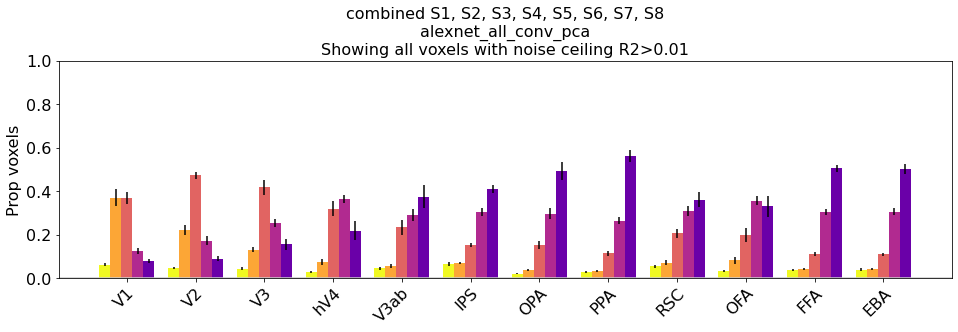

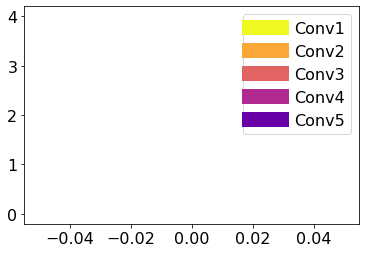

In [20]:
# Make a barplot for variance partition across all ROIs and subjects
roi_names =roi_def.roi_names
areas2plot = np.arange(len(roi_names))

nc_thresh = 0.01

# each of these indices is one feature set left out at a time.
ve_names = ['Conv%d'%(ll+1) for ll in range(5)]

colors = np.flipud(cm.plasma(np.linspace(0,1,6))[1:,:])

vals = np.zeros((n_subjects, len(areas2plot), 5))

for si, ss in enumerate(subjects):
    
    best_layer_ind = np.argmax(out[si]['val_r2'][:,[1,3,5,7,9]], axis=1)
    
    nc = nsd_utils.ncsnr_to_nc(out[si]['voxel_ncsnr'][out[si]['voxel_mask']])/100
    inds2use = nc>nc_thresh


    for ri, rr in enumerate(areas2plot):
        
        inds_this_roi = roi_def.ss_roi_defs[si].get_indices(rr) & inds2use
        if np.sum(inds_this_roi)==0:
            print('subj %d %s has no voxels'%(ss, roi_names[rr]))
            vals[si,ri,:] = np.nan
        vals[si,ri,:] = [np.mean(best_layer_ind[inds_this_roi]==ll) for ll in range(5)]
        
mean_vals = np.mean(vals, axis=0)
sem_vals = np.std(vals, axis=0) / np.sqrt(n_subjects)

legend_separate=True
title='%s\n%s\nShowing all voxels with noise ceiling R2>%.2f'%(summary_plots.get_substr(out), \
                                                                       fitting_type, nc_thresh)

plot_utils.set_all_font_sizes(fs = 16)
fh = plot_utils.plot_multi_bars(mean_data=mean_vals, err_data=sem_vals, colors=colors, space=0.1, \
                xticklabels=np.array(roi_names)[areas2plot], ylabel='Prop voxels', \
                ylim=[0, 1], title=title, horizontal_line_pos=0,\
                legend_labels=ve_names, \
                legend_overlaid=False, legend_separate=legend_separate, \
                fig_size=(16,4))


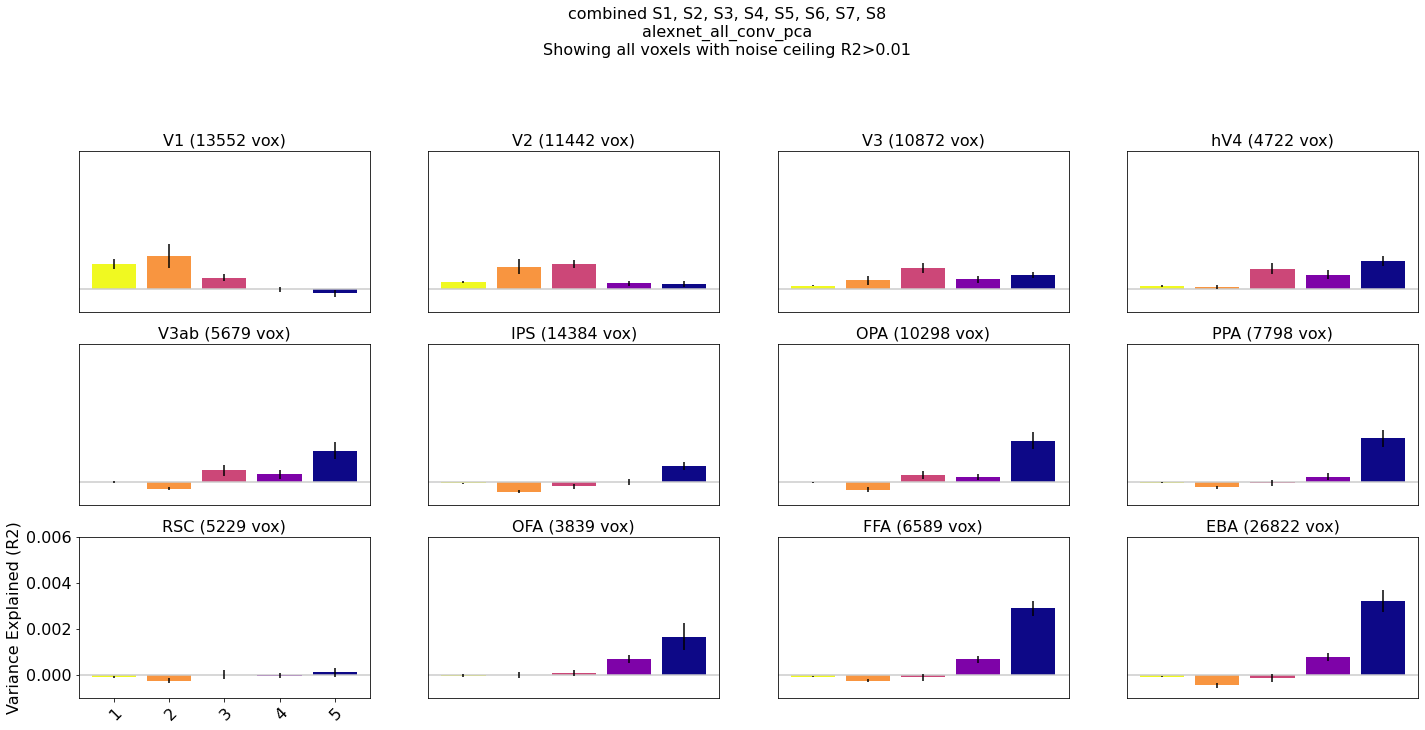

In [13]:
# Make a barplot for variance partition across all ROIs and subjects
# Mean within ROI and then over subjects, errorbars are +/- SEM across subjects

nc_thresh = 0.01

ve_names = ['%d'%(ll+1) for ll in range(5)]
leave_out_inds = np.arange(2, 12, 2)

colors = cm.plasma(np.linspace(0,1,len(leave_out_inds)))
colors = np.flipud(colors)
 
val_r2 = np.concatenate([out[si]['val_r2'] for si in range(n_subjects)], axis=0)

nc = np.concatenate([nsd_utils.ncsnr_to_nc(out[si]['voxel_ncsnr'][out[si]['voxel_mask']])/100 \
                     for si in range(n_subjects)], axis=0)
inds2use = nc>nc_thresh

n_vox = [out[si]['val_r2'].shape[0] for si in range(n_subjects)]
subject_inds = np.concatenate([si*np.ones(n_vox[si],) for si in range(n_subjects)])

var_expl = np.tile(val_r2[:,0:1], [1,5]) - val_r2[:,leave_out_inds]

title='%s\n%s\nShowing all voxels with noise ceiling R2>%.2f'%\
        (summary_plots.get_substr(out),fitting_type, nc_thresh)

bp = plot_utils.bar_plot(colors=colors, column_labels=ve_names, \
                         ylabel='Variance Explained (R2)', \
                         horizontal_line_pos=0, ylims=[-0.001, 0.006])

plot_utils.set_all_font_sizes(fs = 16)
plot_utils.create_roi_subplots(var_expl, inds2use, bp, roi_def=roi_def,\
                    subject_inds=subject_inds,\
                    suptitle=title)

plt.gcf().subplots_adjust(bottom=0.5)

fn2save = '/user_data/mmhender/imStat/figures/alexnet_layers_varpart.pdf'
plt.savefig(fn2save)

In [3]:
port=44442
summary_plots.plot_summary_pycortex(fitting_type, out, port, roi_def=roi_def, simplest_roi_maps=True)

navigate browser to: 127.0.0.1:44442
Started server on port 44442
Stopping server


In [3]:
# Make plots in pycortex for variance partitioning analysis
# Full variance partition over all subsets

import cortex
from utils import numpy_utils

port=44442

title = '%s, %s'%(summary_plots.get_substr(out), fitting_type);

names = []
maps = []
cmaps = []
mins = []
maxes = []
vox2plot = []
subject_map_inds = []
map_sequence = []

for si, ss in enumerate(subjects):

    names += ['S%d: Full model (sqrt R2)'%ss]
    maps += [np.sqrt(out[si]['val_r2'][:,0])]
    cmaps += ['PuBu']
    mins += [0]
    maxes += [0.60]

    ff_inds = np.arange(2, 11, 2)
    n_submodels = len(ff_inds)

    val_r2 = out[si]['val_r2']
    var_expl = np.tile(np.expand_dims(val_r2[:,0], axis=1), [1,n_submodels]) - val_r2[:,ff_inds] 
    ve_names = ['Unique: ' + out[si]['partial_version_names'][ff].split('leave_out_')[1] \
                                 for ff in ff_inds]
    ve_names = ['S%d: '%ss + vn for vn in ve_names]
    names += ve_names
    maps += [np.sqrt(var_expl[:,ff]) for ff in range(n_submodels)]
    cmaps += ['PuBu' for ff in range(n_submodels)]
    mins += [0 for ff in range(n_submodels)]
    maxes += [0.2 for ff in range(n_submodels)]
    
    names += ['S%d: Preferred feature type (max unique var)'%ss]
    maps += [np.argmax(var_expl, axis=1).astype(np.float32)]
    cmaps += ['plasma_r']
    mins += [0]
    maxes += [n_submodels+1]
    
    indiv_var = val_r2[:,np.arange(1,10,2)]
    names += ['S%d: Preferred feature type (R2 individually var)'%ss]
    maps += [np.argmax(indiv_var, axis=1).astype(np.float32)]
    cmaps += ['plasma_r']
    mins += [0]
    maxes += [n_submodels+1]

    vox2plot.append(out[si]['val_r2'][:,0]>0.01)
    
    n_new_maps = int(len(names)/(si+1))
    subject_map_inds += [si for ii in range(n_new_maps)]
    map_sequence += [ni for ni in range(n_new_maps)]
    
# putting them into a nicer order (want same type of map near each other to compare subs)
_, new_order = numpy_utils.double_sort(np.arange(len(maps)), map_sequence, subject_map_inds)
names = [names[ni] for ni in new_order]
cmaps = [cmaps[ni] for ni in new_order]
mins = [mins[ni] for ni in new_order]
maxes = [maxes[ni] for ni in new_order]
maps = [maps[ni] for ni in new_order]
subject_map_inds = [subject_map_inds[ni] for ni in new_order]



voxel_mask = [o['voxel_mask'] for o in out]
nii_shape = [o['brain_nii_shape'] for o in out]
volume_space = out[0]['volume_space']

pycortex_plot_utils.plot_maps_pycortex(subjects, port, maps, names, subject_map_inds=subject_map_inds, \
                        mins=mins, maxes=maxes, cmaps=cmaps, \
                        title=title, vox2plot = vox2plot, roi_def=None, \
                        voxel_mask =voxel_mask, \
                        nii_shape = nii_shape, \
                        volume_space=volume_space)

/home/mmhender/myenv/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in sqrt
/home/mmhender/myenv/lib/python3.7/site-packages/ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in sqrt


navigate browser to: 127.0.0.1:44442
Started server on port 44442


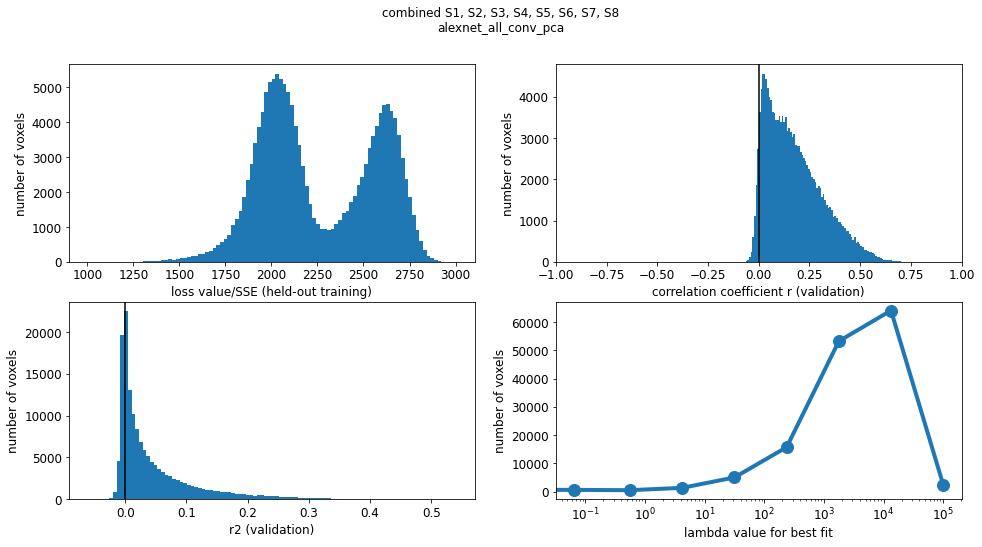

In [5]:
plot_utils.set_all_font_sizes(fs = 12)
summary_plots.plot_perf_summary(fitting_type, out, fig_save_folder=fig_save_folder)

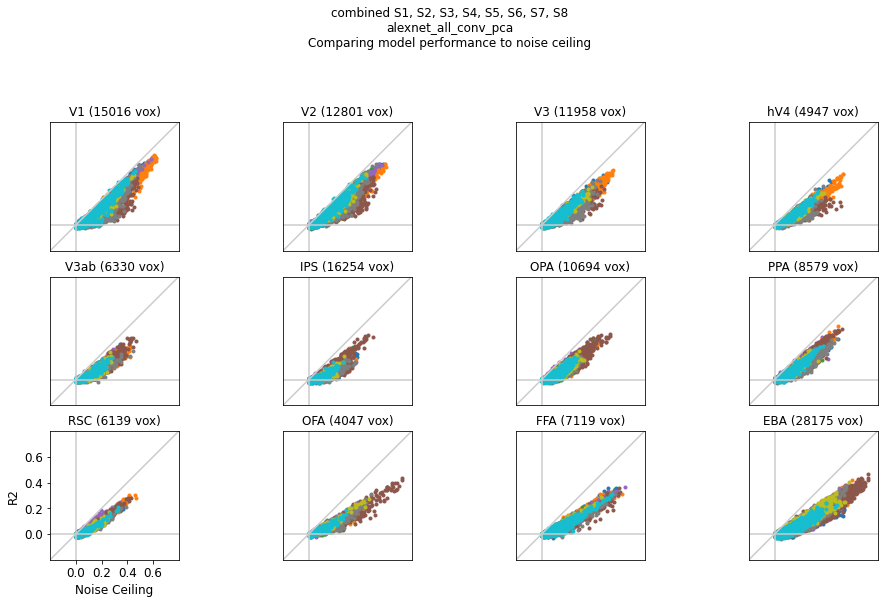

In [9]:
plot_utils.set_all_font_sizes(fs = 12)
summary_plots.plot_r2_vs_nc(fitting_type, out, roi_def=roi_def,\
                            fig_save_folder=fig_save_folder,axlims = [-0.2, 0.8])